# W2: PCA and SOM

#### PCA
1. Reduce dimensionality with PCA
2. Analyse K-Prototype with and without dimensionality reduction

#### SOM
3. Analyse SOM as a clustering algorithm
4. Compare K-Prototype and SOM


Maximum number of pages: 16!
(alguns locos en el primer projecte n'han fet 60 xD)

-----------------

## PCA

In [11]:
from utils.dataset import read_dataset

import os

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
#import seaborn as sns # for plotting categorical data


- Step 1. Read the .arff file and take the whole data set consisting of d-dimensional samples
ignoring the class labels. Save the information in a matrix.

In [3]:
dataset = read_dataset('segment')
data = dataset['data']

df = pd.DataFrame(data)

# Real Y labels
y = df['class'].copy()
x = df.drop(columns=['class', 'region-pixel-count'])

features = x.columns

x.head()

,region-centroid-col,region-centroid-row,short-line-density-5,short-line-density-2,vedge-mean,vegde-sd,hedge-mean,hedge-sd,intensity-mean,rawred-mean,rawblue-mean,rawgreen-mean,exred-mean,exblue-mean,exgreen-mean,value-mean,saturation-mean,hue-mean
0,218.0,178.0,0.111111,0.0,0.833333,0.547722,1.111110,0.544331,59.629600,52.4444,75.22220,51.222200,-21.55560,46.7778,-25.22220,75.22220,0.318996,-2.04055
1,113.0,130.0,0.000000,0.0,0.277778,0.250924,0.333333,0.365148,0.888889,0.0000,2.55556,0.111111,-2.66667,5.0000,-2.33333,2.55556,1.000000,-2.12325
2,202.0,41.0,0.000000,0.0,0.944448,0.772202,1.111110,1.025600,123.037000,111.8890,139.77800,117.444000,-33.44440,50.2222,-16.77780,139.77800,0.199347,-2.29992
3,32.0,173.0,0.000000,0.0,1.722220,1.781590,9.000000,6.749490,43.592600,39.5556,52.88890,38.333300,-12.11110,27.8889,-15.77780,52.88890,0.266914,-1.99886
4,61.0,197.0,0.000000,0.0,1.444440,1.515350,2.611110,1.925460,49.592600,44.2222,61.55560,43.000000,-16.11110,35.8889,-19.77780,61.55560,0.302925,-2.02227


- Step 2. Plot the original data set (choose two or three of its features to visualize it).

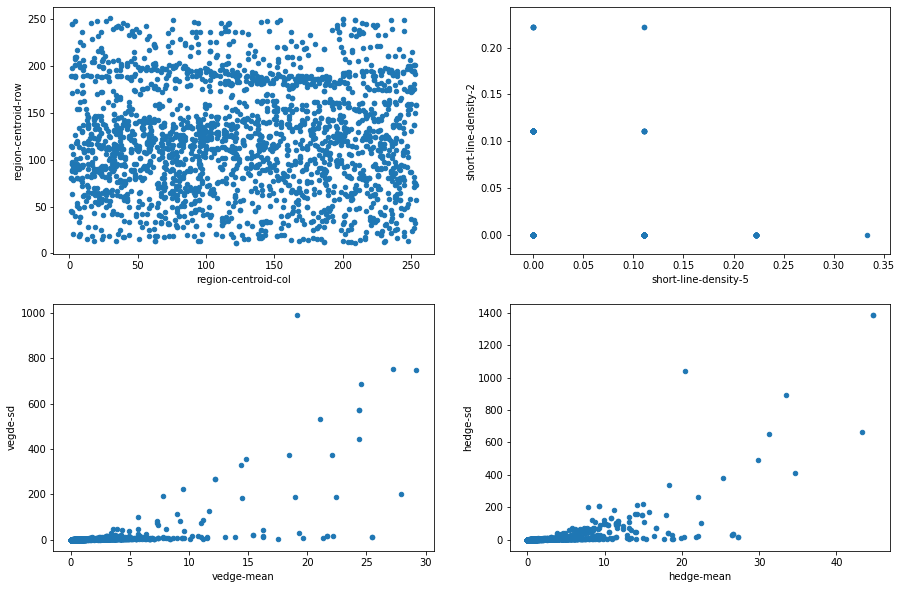

In [4]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(15,10))

x.plot(x=features[0], y=features[1], kind='scatter', ax=ax[0][0])
x.plot(x=features[2], y=features[3], kind='scatter', ax=ax[0][1])
x.plot(x=features[4], y=features[5], kind='scatter', ax=ax[1][0])
x.plot(x=features[6], y=features[7], kind='scatter', ax=ax[1][1])

#sns.set(style="ticks", color_codes=True)
#sns.catplot(x=categorical_features[0], y=numerical_features[0], jitter=False, data=x);


- Step 3. Compute the d-dimensional mean vector (i.e., the means of every dimension of the
whole data set).

In [7]:
x_mean = x.mean()
print(x_mean)

region-centroid-col     124.913853
region-centroid-row     123.417316
short-line-density-5      0.014334
short-line-density-2      0.004714
vedge-mean                1.893940
vegde-sd                  5.709320
hedge-mean                2.424723
hedge-sd                  8.243692
intensity-mean           37.051595
rawred-mean              32.821309
rawblue-mean             44.187877
rawgreen-mean            34.145601
exred-mean              -12.690860
exblue-mean              21.408850
exgreen-mean             -8.717989
value-mean               45.137468
saturation-mean           0.426893
hue-mean                 -1.362897
dtype: float64


- Step 4. Compute the covariance matrix of the whole data set. Show this information.

In [8]:
x_cov = x.cov()
print(x_cov)

                      region-centroid-col  region-centroid-row  \
region-centroid-col           5322.655633           112.261605   
region-centroid-row            112.261605          3304.393117   
short-line-density-5            -0.152222             0.149783   
short-line-density-2            -0.028226             0.058327   
vedge-mean                      -2.225818             4.056431   
vegde-sd                        71.850743          -138.121234   
hedge-mean                      -4.981611            21.835945   
hedge-sd                        -8.318749           -71.256534   
intensity-mean                 164.209229         -1020.982620   
rawred-mean                    139.752925          -942.593399   
rawblue-mean                   184.722750         -1204.824892   
rawgreen-mean                  168.151916          -915.529726   
exred-mean                     -73.368311           235.168142   
exblue-mean                     61.539927          -551.526997   
exgreen-me

- Step 5. Calculate eigenvectors (e1, e2, …, ed) and their corresponding eigenvalues of the
covariance matrix. Use numpy library. Write them in console.

In [101]:
eigenvalues, eigenvectors = np.linalg.eig(x_cov)
m = len(eigenvalues)
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:", eigenvectors)

Eigenvalues: [9.14303165e+03 5.31984324e+03 4.73373832e+03 2.28196115e+03
 7.40075285e+02 2.27198891e+02 5.65467407e+01 7.75075241e+00
 3.02612396e+00 1.35900712e+00 2.57259667e-01 2.05023746e-02
 1.56374345e-03 5.19612494e-04 5.67582040e-10 1.13608945e-08
 8.24330478e-09 9.77730108e-09]
Eigenvectors: [[ 8.24446942e-02  9.92609045e-01  2.47075683e-02 -8.34839203e-02
   1.70606459e-02 -1.28883537e-03 -7.30417620e-03  1.83106981e-03
   4.12868578e-04 -4.68369601e-04 -5.17025870e-04 -1.97282387e-04
   2.87219679e-05  2.18601494e-06 -5.99149960e-09  4.36988356e-08
  -2.73941216e-08 -3.34634442e-08]
 [-3.82651486e-01  1.08266752e-01  2.77384114e-02  9.11631395e-01
  -4.84956223e-02 -7.74630694e-02 -3.56406099e-02 -1.33245460e-02
   5.11596856e-05  1.46041560e-02 -1.20780131e-03 -1.93170723e-04
   2.13893415e-05 -3.10382954e-05  1.19568926e-08  3.06007520e-08
  -1.74797643e-08 -4.86976476e-09]
 [-1.49269395e-05 -2.52586641e-05  2.21945717e-05  5.26256353e-05
  -1.39658273e-05  4.70446141e-05

In [102]:
# Checking results: the following operation should return a vector of 0's (or numerically 
# equivalent values like 1e-12 due to precision loss in float comma operations)
np.dot((x_cov - eigenvalues[0] * np.identity(m)), eigenvectors[:,0])

array([-1.85965826e-12,  6.71812606e-12, -1.43859190e-12, -1.26878861e-14,
       -3.23872873e-14,  3.79557497e-15, -2.60503424e-14, -5.79619686e-13,
       -1.44442791e-12, -5.73766035e-12, -8.06232858e-12, -2.11189399e-12,
        1.93981636e-12, -3.01053626e-12,  1.35726153e-12, -7.90745247e-12,
        1.95399252e-14,  7.10542736e-14])

- Step 6. Sort the eigenvectors by decreasing eigenvalues and choose k eigenvectors with the
largest eigenvalues to form a new d x k dimensional matrix (where every column
represents an eigenvector). Write the sorted eigenvectors and eigenvalues in console.

In [116]:
idx = eigenvalues.argsort()[::-1]   
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]

- Step 7. Derive the new data set. Use this d x k eigenvector matrix to transform the samples
onto the new subspace.

[[ 8.24446942e-02  9.92609045e-01  2.47075683e-02]
 [-3.82651486e-01  1.08266752e-01  2.77384114e-02]
 [-1.49269395e-05 -2.52586641e-05  2.21945717e-05]
 [-1.61269726e-06 -2.19488035e-06 -8.55113928e-05]
 [ 5.21227338e-04  1.98765478e-04 -2.27071326e-02]
 [ 1.70926658e-02  2.47713945e-02 -5.63042294e-01]
 [ 8.69077864e-04  1.37144945e-04 -3.36667492e-02]
 [ 2.35253694e-02  1.42397861e-02 -8.23489867e-01]
 [ 3.89264055e-01 -1.87784352e-02  1.86699773e-02]
 [ 3.56033209e-01 -1.93552453e-02  1.97415119e-02]
 [ 4.45821116e-01 -2.27602054e-02  1.85396665e-02]
 [ 3.65937862e-01 -1.42198762e-02  1.77286975e-02]
 [-9.96926073e-02 -1.73030456e-03  3.21464284e-03]
 [ 1.69671238e-01 -1.19454387e-02 -3.90883216e-04]
 [-6.99786339e-02  1.36757363e-02 -2.82376581e-03]
 [ 4.37383027e-01 -2.00888064e-02  2.00420821e-02]
 [-1.30518220e-03 -2.11821224e-04 -5.67859030e-05]
 [-7.16778974e-03  2.31013490e-03  1.54568744e-03]]


- Step 8. Plot the new subspace (choose the largest eigenvectors to plot the matrix).

- Step 9. Reconstruct the data set back to the original one. Additionally, plot the data set.

In [93]:
A = np.array([[1, -1], [1, 1]])
print("A:", A)
w, v = np.linalg.eig(A)
print("Eigvalues w:", w)
print("Eigvectors v:", v)
(A - w[0]*np.identity(2))*v[:,0]

A: [[ 1 -1]
 [ 1  1]]
Eigvalues w: [1.+1.j 1.-1.j]
Eigvectors v: [[0.70710678+0.j         0.70710678-0.j        ]
 [0.        -0.70710678j 0.        +0.70710678j]]


array([[ 0.        -0.70710678j,  0.        +0.70710678j],
       [ 0.70710678+0.j        , -0.70710678-0.j        ]])

In [98]:
A = np.array([[1,2,3],[3,2,1],[1,0,-1]])
w, v = np.linalg.eig(A)
print("Eigvalues w:", w)
print("Eigvectors v:", v)
v1 = v[:,1]
print(v1)
lam1 = w[1]
print(lam1)
np.dot((A - w[0]*np.identity(3)),v[:,0])

Eigvalues w: [ 4.31662479e+00 -2.31662479e+00  1.93041509e-17]
Eigvectors v: [[ 0.58428153  0.73595785  0.40824829]
 [ 0.80407569 -0.38198836 -0.81649658]
 [ 0.10989708 -0.55897311  0.40824829]]
[ 0.73595785 -0.38198836 -0.55897311]
-2.3166247903554


array([ 8.88178420e-16, -7.35522754e-16,  0.00000000e+00])